In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('./house_pricing.csv')

In [3]:
df_last_15_columns = df.iloc[: , -15:]
df_last_15_columns

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df_last_15_columns.describe()

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
matrix = df_last_15_columns.corr()
matrix

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
WoodDeckSF,1.000000,0.058661,-0.125989,-0.032771,-0.074181,0.073378,-0.009551,0.021011,0.022270,0.324413
OpenPorchSF,0.058661,1.000000,-0.093079,-0.005842,0.074304,0.060762,-0.018584,0.071255,-0.057619,0.315856
EnclosedPorch,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,0.018361,-0.028887,-0.009916,-0.128578
3SsnPorch,-0.032771,-0.005842,-0.037305,1.000000,-0.031436,-0.007992,0.000354,0.029474,0.018645,0.044584
ScreenPorch,-0.074181,0.074304,-0.082864,-0.031436,1.000000,0.051307,0.031946,0.023217,0.010694,0.111447
PoolArea,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000,0.029669,-0.033737,-0.059689,0.092404
MiscVal,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,-0.021190
MoSold,0.021011,0.071255,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,0.046432
YrSold,0.022270,-0.057619,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.028923
SalePrice,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000


<AxesSubplot:>

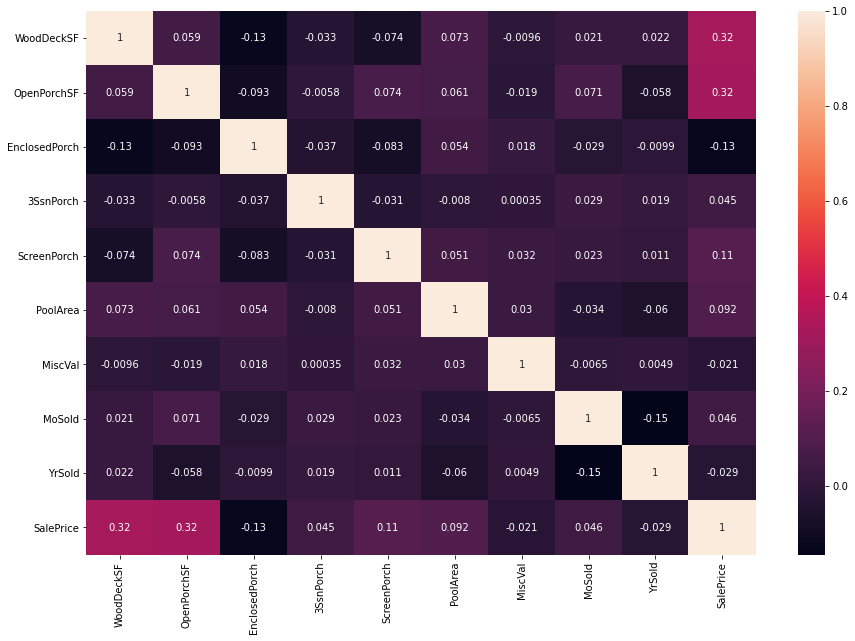

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(matrix, annot=True)

In [14]:
tab = np.abs(matrix['SalePrice'].sort_values(ascending=False))
tab

SalePrice        1.000000
WoodDeckSF       0.324413
OpenPorchSF      0.315856
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
MiscVal          0.021190
YrSold           0.028923
EnclosedPorch    0.128578
Name: SalePrice, dtype: float64